In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('prep.csv')
df=pd.get_dummies(df,drop_first=True)

In [3]:
df

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,False,False,False,False,False,False,True,True,False,True
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,True,False,False,False,False,False,True,False,False,True
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,True,False,False,False,False,False,True,False,False,True
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,True,False,False,False,False,False,True,False,True,True
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,True,False,False,False,False,False,True,False,False,True
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,True,False,False,True,True,False,True,False,True,True
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,True,False,False,True,True,False,False,False,False,True
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,True,False,False,True,True,False,True,False,True,True


In [4]:
indep=df.drop('classification_yes',axis=1)
dep=df['classification_yes']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size = 0.25, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  

In [6]:
modellog = LogisticRegression(random_state = 0)
modellog.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [7]:
imp_log=modellog.coef_[0]

In [8]:
for feature,importance in zip(indep,imp_log):
    print (feature,importance)

age -0.3252729818701318
bp 0.38863893701979113
al 0.9309020284594323
su 0.5113047233562916
bgr 0.5706814339139111
bu 0.4956924735340085
sc 0.9370680612275899
sod -0.3238902503284909
pot -0.010248184677843898
hrmo -1.4848096156850483
pcv -1.1613968418516312
wc -0.05619071928136482
rc -0.8026130167116887
sg_b -0.7455306689191025
sg_c 1.5306590335228407
sg_d 0.9762274168831315
sg_e 0.09889840235476934
rbc_normal -0.6676619733271753
pc_normal -0.41847022263846156
pcc_present 0.1408795524397642
ba_present 0.019800635965908194
htn_yes 1.0317725726232236
dm_yes 0.8650652105661876
cad_yes 0.07349959532695136
appet_yes -0.2173530752111118
pe_yes 0.5800238527284981
ane_yes 0.3608904324712051


In [9]:
log_df=pd.DataFrame({'Feature Names' : indep.columns , 'importances' : imp_log } ) 

In [10]:
log_df=log_df.sort_values(by='importances',ascending=False)

In [11]:
log_df

,Feature Names,importances
14,sg_c,1.530659
21,htn_yes,1.031773
15,sg_d,0.976227
6,sc,0.937068
2,al,0.930902
22,dm_yes,0.865065
25,pe_yes,0.580024
4,bgr,0.570681
3,su,0.511305
5,bu,0.495692


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10048\790753190.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=log_df,x='Feature Names',y='importances',palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'sg_c'),
  Text(1, 0, 'htn_yes'),
  Text(2, 0, 'sg_d'),
  Text(3, 0, 'sc'),
  Text(4, 0, 'al'),
  Text(5, 0, 'dm_yes'),
  Text(6, 0, 'pe_yes'),
  Text(7, 0, 'bgr'),
  Text(8, 0, 'su'),
  Text(9, 0, 'bu'),
  Text(10, 0, 'bp'),
  Text(11, 0, 'ane_yes'),
  Text(12, 0, 'pcc_present'),
  Text(13, 0, 'sg_e'),
  Text(14, 0, 'cad_yes'),
  Text(15, 0, 'ba_present'),
  Text(16, 0, 'pot'),
  Text(17, 0, 'wc'),
  Text(18, 0, 'appet_yes'),
  Text(19, 0, 'sod'),
  Text(20, 0, 'age'),
  Text(21, 0, 'pc_normal'),
  Text(22, 0, 'rbc_normal'),
  Text(23, 0, 'sg_b'),
  Text(24, 0, 'rc'),
  Text(25, 0, 'pcv'),
  Text(26, 0, 'hrmo')])

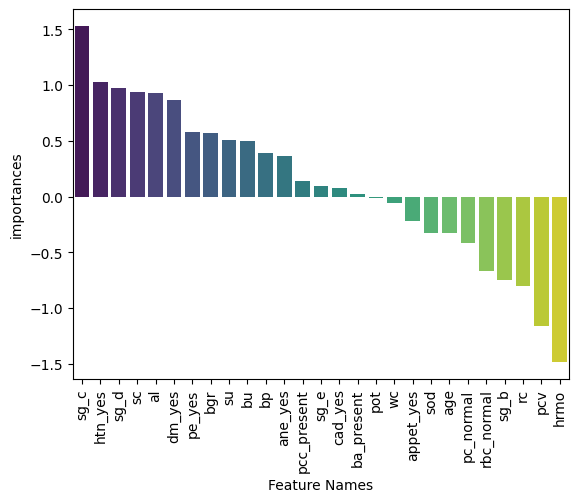

In [12]:
sns.barplot(data=log_df,x='Feature Names',y='importances',palette='viridis')
import matplotlib.pyplot as plt
plt.xticks(rotation=90)

# Using Decision Tree

In [20]:
model_dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
imp_dtree=model_dtree.feature_importances_

In [26]:
feat_dtree=pd.DataFrame({'Feature Names' : indep.columns,'Importances' :imp_dtree})
feat_dtree=feat_dtree.sort_values(by='Importances',ascending=False)
feat_dtree

,Feature Names,Importances
9,hrmo,0.649406
4,bgr,0.100471
6,sc,0.088538
14,sg_c,0.067976
5,bu,0.036813
12,rc,0.027606
1,bp,0.016357
0,age,0.012832
20,ba_present,0.000000
19,pcc_present,0.000000


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10048\1047413390.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_dtree,x='Feature Names',y='Importances',palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'hrmo'),
  Text(1, 0, 'bgr'),
  Text(2, 0, 'sc'),
  Text(3, 0, 'sg_c'),
  Text(4, 0, 'bu'),
  Text(5, 0, 'rc'),
  Text(6, 0, 'bp'),
  Text(7, 0, 'age'),
  Text(8, 0, 'ba_present'),
  Text(9, 0, 'pcc_present'),
  Text(10, 0, 'dm_yes'),
  Text(11, 0, 'htn_yes'),
  Text(12, 0, 'rbc_normal'),
  Text(13, 0, 'cad_yes'),
  Text(14, 0, 'appet_yes'),
  Text(15, 0, 'pe_yes'),
  Text(16, 0, 'pc_normal'),
  Text(17, 0, 'sg_b'),
  Text(18, 0, 'sg_e'),
  Text(19, 0, 'sg_d'),
  Text(20, 0, 'wc'),
  Text(21, 0, 'pcv'),
  Text(22, 0, 'pot'),
  Text(23, 0, 'sod'),
  Text(24, 0, 'su'),
  Text(25, 0, 'al'),
  Text(26, 0, 'ane_yes')])

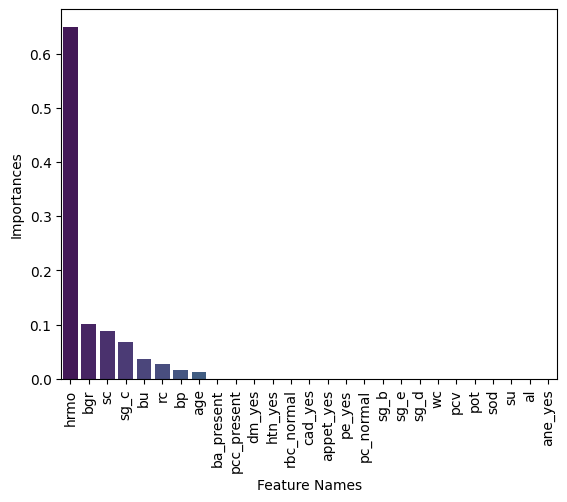

In [28]:
sns.barplot(data=feat_dtree,x='Feature Names',y='Importances',palette='viridis')
plt.xticks(rotation=90)

# Using Random Forest

In [30]:
model_rforest= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_rforest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
imp_rf=model_rforest.feature_importances_
feat_rf=pd.DataFrame({'Feature Names' : indep.columns,'Importances' :imp_rf})
feat_rf=feat_rf.sort_values(by='Importances',ascending=False)
feat_rf

,Feature Names,Importances
10,pcv,0.336585
9,hrmo,0.151938
12,rc,0.105640
2,al,0.081954
6,sc,0.046408
4,bgr,0.045056
7,sod,0.043095
5,bu,0.039401
21,htn_yes,0.027220
14,sg_c,0.019915


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_10048\3179589297.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_rf,x='Feature Names',y='Importances',palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'pcv'),
  Text(1, 0, 'hrmo'),
  Text(2, 0, 'rc'),
  Text(3, 0, 'al'),
  Text(4, 0, 'sc'),
  Text(5, 0, 'bgr'),
  Text(6, 0, 'sod'),
  Text(7, 0, 'bu'),
  Text(8, 0, 'htn_yes'),
  Text(9, 0, 'sg_c'),
  Text(10, 0, 'su'),
  Text(11, 0, 'age'),
  Text(12, 0, 'sg_b'),
  Text(13, 0, 'dm_yes'),
  Text(14, 0, 'pot'),
  Text(15, 0, 'pc_normal'),
  Text(16, 0, 'wc'),
  Text(17, 0, 'pe_yes'),
  Text(18, 0, 'bp'),
  Text(19, 0, 'appet_yes'),
  Text(20, 0, 'sg_d'),
  Text(21, 0, 'ane_yes'),
  Text(22, 0, 'sg_e'),
  Text(23, 0, 'rbc_normal'),
  Text(24, 0, 'pcc_present'),
  Text(25, 0, 'ba_present'),
  Text(26, 0, 'cad_yes')])

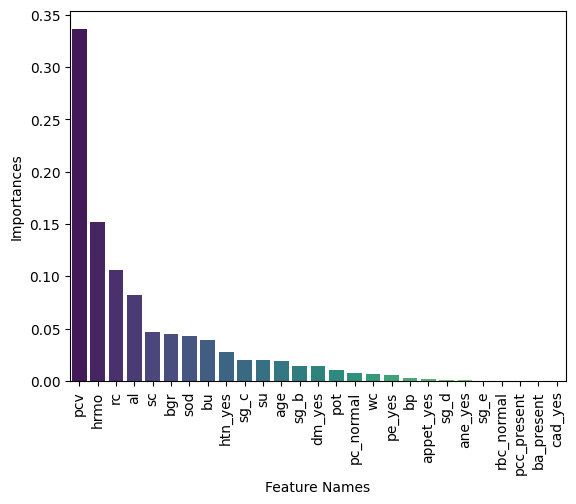

In [32]:
sns.barplot(data=feat_rf,x='Feature Names',y='Importances',palette='viridis')
plt.xticks(rotation=90)